# Acquire and Prep - Wrangle


Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.


Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.


Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
from env import user, password, host

In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
# function to query database and return zillow df
def get_data_from_sql():
    query = """
    my query;
    """
    df = pd.read_sql(query, get_db_url('zillow'))
    return df

In [4]:
df = pd.read_sql('SELECT bedroomcnt as bedrooms, bathroomcnt as bathrooms, calculatedfinishedsquarefeet as square_feet,taxamount as taxes, taxvaluedollarcnt as home_value, propertylandusedesc, fips as fips_number, regionidzip as zip_code FROM predictions_2017 JOIN properties_2017 USING(id) JOIN propertylandusetype USING(propertylandusetypeid) ORDER BY fips;', get_connection('zillow'))


In [5]:
df.head(20)

,bedrooms,bathrooms,square_feet,taxes,home_value,propertylandusedesc,fips_number,zip_code
0,3.0,2.0,1215.0,3183.50,254777.0,Single Family Residential,6037.0,96339.0
1,5.0,3.0,3057.0,10708.94,877410.0,Single Family Residential,6037.0,96339.0
2,6.0,6.0,7235.0,17648.66,1456742.0,Single Family Residential,6037.0,96339.0
3,3.0,3.0,2070.0,4301.07,339531.0,Single Family Residential,6037.0,96339.0
4,4.0,3.0,2194.0,6179.92,492549.0,Single Family Residential,6037.0,96339.0
5,4.0,3.0,2047.0,4505.21,360557.0,Single Family Residential,6037.0,96339.0
6,3.0,2.0,2053.0,5242.07,423766.0,Single Family Residential,6037.0,96339.0
7,3.0,2.0,1553.0,3974.86,311974.0,Single Family Residential,6037.0,96342.0
8,4.0,2.0,2006.0,2576.11,194900.0,Single Family Residential,6037.0,96342.0
9,4.0,3.0,2012.0,5232.90,420000.0,Single Family Residential,6037.0,96342.0


Summarize our data by: describe(), info(), isnull(), value_counts(), shape

In [6]:
df.describe()

,bedrooms,bathrooms,square_feet,taxes,home_value,fips_number,zip_code
count,77614.000000,77614.000000,76502.000000,7.710300e+04,7.668900e+04,77614.000000,77339.000000
mean,3.083993,2.214626,1834.941008,5.371524e+03,4.407452e+05,6048.596233,96562.280298
std,1.275545,1.083466,1547.260081,1.040755e+04,8.343268e+05,21.128933,3797.281883
min,0.000000,0.000000,20.000000,2.540000e+00,8.000000e+00,6037.000000,95982.000000
25%,2.000000,2.000000,1217.000000,2.449600e+03,1.870340e+05,6037.000000,96186.000000
50%,3.000000,2.000000,1578.000000,4.006660e+03,3.215800e+05,6037.000000,96379.000000
75%,4.000000,3.000000,2147.000000,6.198595e+03,5.130000e+05,6059.000000,96978.000000
max,25.000000,20.000000,161232.000000,1.824155e+06,1.491392e+08,6111.000000,399675.000000


In [7]:
df.shape

(77614, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77614 entries, 0 to 77613
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedrooms             77614 non-null  float64
 1   bathrooms            77614 non-null  float64
 2   square_feet          76502 non-null  float64
 3   taxes                77103 non-null  float64
 4   home_value           76689 non-null  float64
 5   propertylandusedesc  77614 non-null  object 
 6   fips_number          77614 non-null  float64
 7   zip_code             77339 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.7+ MB


In [9]:
df.value_counts()

bedrooms  bathrooms  square_feet  taxes     home_value  propertylandusedesc        fips_number  zip_code
2.0       2.0        1005.0       3252.16   179636.0    Condominium                6037.0       96494.0     4
                     950.0        2264.43   169911.0    Condominium                6037.0       96506.0     3
                                  2266.14   169911.0    Condominium                6037.0       96506.0     3
                     916.0        1263.20   121162.0    Condominium                6059.0       96962.0     3
3.0       2.0        1456.0       7148.84   635000.0    Condominium                6059.0       96947.0     3
                                                                                                           ..
                     1115.0       2942.80   237656.0    Single Family Residential  6037.0       96012.0     1
                                  2409.20   191803.0    Condominium                6059.0       97024.0     1
               

In [11]:
df.columns[df.isnull().any()]
# show columns that have null values

Index(['square_feet', 'taxes', 'home_value', 'zip_code'], dtype='object')

In [10]:
df.isna().sum()
# check columns for significant nulls

bedrooms                  0
bathrooms                 0
square_feet            1112
taxes                   511
home_value              925
propertylandusedesc       0
fips_number               0
zip_code                275
dtype: int64

In [12]:
df['bedrooms'].value_counts(ascending=True)
#show value counts for bedroom count

25.0        1
14.0        1
16.0        1
11.0       16
12.0       26
10.0       38
9.0       113
7.0       278
8.0       334
6.0      1276
1.0      2154
0.0      3328
5.0      4805
2.0     15841
4.0     19080
3.0     30322
Name: bedrooms, dtype: int64

In [13]:
df['zip_code'].value_counts(ascending=True)
#summary zipcode with value counts

96467.0      1
96500.0      1
97177.0      1
96226.0      4
96329.0      5
          ... 
97318.0    523
96193.0    536
96987.0    560
96368.0    597
97118.0    604
Name: zip_code, Length: 387, dtype: int64

In [14]:
df['taxes'].value_counts(ascending=True)
#summary of taxes with value counts

1018.46     1
6323.76     1
2128.18     1
11009.78    1
5237.98     1
           ..
5259.64     4
54.28       4
3146.10     4
7148.84     4
4543.58     6
Name: taxes, Length: 73421, dtype: int64

In [15]:
df.query('bedrooms == 0')
# bedrooms with value count of zero

,bedrooms,bathrooms,square_feet,taxes,home_value,propertylandusedesc,fips_number,zip_code
830,0.0,0.0,168.0,2394.52,198411.0,Single Family Residential,6037.0,96449.0
1485,0.0,0.0,2738.0,3897.58,288525.0,Single Family Residential,6037.0,96346.0
1930,0.0,0.0,1636.0,1488.27,65990.0,Single Family Residential,6037.0,97328.0
2076,0.0,0.0,189.0,13.49,105.0,Single Family Residential,6037.0,96241.0
2177,0.0,0.0,NaN,536.31,34386.0,"Triplex (3 Units, Any Combination)",6037.0,96366.0
...,...,...,...,...,...,...,...,...
77425,0.0,0.0,1593.0,1633.70,145208.0,"Duplex (2 Units, Any Combination)",6111.0,97081.0
77426,0.0,0.0,3132.0,1153.66,98952.0,"Triplex (3 Units, Any Combination)",6111.0,97081.0
77441,0.0,0.0,1966.0,5309.70,499309.0,"Duplex (2 Units, Any Combination)",6111.0,97083.0
77488,0.0,0.0,2092.0,3427.16,316956.0,"Duplex (2 Units, Any Combination)",6111.0,97084.0


In [16]:
df = df[df.bathrooms != 0]
#drop bathrooms with value count zero

In [24]:
df = df[df.bedrooms != 0]
#drop bedrooms with bedroom count zero

In [26]:
df.sort_values(["bedrooms"], ascending=True)
#I can confirm that bedrooms with 0 count have been dropped in new df

,bedrooms,bathrooms,square_feet,taxes,home_value,propertylandusedesc,fips_number,zip_code
46764,1.0,1.0,726.0,4020.68,341000.0,Condominium,6037.0,96294.0
47158,1.0,1.0,702.0,1041.52,63451.0,Single Family Residential,6037.0,95983.0
47165,1.0,1.0,576.0,1929.19,142902.0,Single Family Residential,6037.0,95983.0
65613,1.0,1.0,531.0,1553.78,115543.0,Condominium,6059.0,97018.0
65612,1.0,1.0,531.0,3305.12,282000.0,Condominium,6059.0,97018.0
...,...,...,...,...,...,...,...,...
42993,12.0,5.0,2342.0,7298.77,575000.0,"Quadruplex (4 Units, Any Combination)",6037.0,96239.0
23215,12.0,8.0,4263.0,10484.53,850000.0,"Quadruplex (4 Units, Any Combination)",6037.0,96238.0
42722,14.0,14.0,6064.0,9736.38,750724.0,"Quadruplex (4 Units, Any Combination)",6037.0,96010.0
20807,16.0,12.0,7168.0,19603.62,1479880.0,"Quadruplex (4 Units, Any Combination)",6037.0,96515.0


In [25]:
df.sort_values(["bedrooms"], ascending=False)
#show bedroom count in descending order

,bedrooms,bathrooms,square_feet,taxes,home_value,propertylandusedesc,fips_number,zip_code
22322,25.0,20.0,11700.0,19238.87,1608491.0,Single Family Residential,6037.0,96220.0
20807,16.0,12.0,7168.0,19603.62,1479880.0,"Quadruplex (4 Units, Any Combination)",6037.0,96515.0
42722,14.0,14.0,6064.0,9736.38,750724.0,"Quadruplex (4 Units, Any Combination)",6037.0,96010.0
34417,12.0,12.0,4784.0,12712.46,1021087.0,"Quadruplex (4 Units, Any Combination)",6037.0,96007.0
23218,12.0,8.0,4488.0,5078.20,381597.0,"Quadruplex (4 Units, Any Combination)",6037.0,96245.0
...,...,...,...,...,...,...,...,...
24148,1.0,1.0,520.0,3440.17,254544.0,Single Family Residential,6037.0,96490.0
24184,1.0,1.0,440.0,796.04,38340.0,Single Family Residential,6037.0,96169.0
48887,1.0,1.0,768.0,457.24,33084.0,Single Family Residential,6037.0,96221.0
11275,1.0,1.0,634.0,1873.08,129867.0,Condominium,6037.0,96190.0


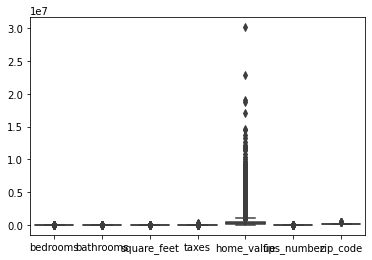

In [28]:
sns.boxplot(data=df)
plt.show()

In [ ]:
#example function will update

def wrangle_zillow():
    '''
    Read student_grades csv file into a pandas DataFrame,
    drop student_id column, replace whitespaces with NaN values,
    drop any rows with Null values, convert all columns to int64,
    return cleaned student grades DataFrame.
    '''
    # Acquire data from csv file.
    grades = pd.read_csv('./data/student_grades.csv')

    # Replace white space values with NaN values.
    grades = grades.replace(r'^\s*$', np.nan, regex=True)

    # Drop all rows with NaN values.
    df = df[df.bathrooms != 0]
    df = df[df.bedrooms != 0]

    # Convert all columns to int64 data types.
    df = df.astype('int')

    return df